# Project 3: Classification with Logistic Regression and SVM

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Your NAME, #XXXXXXXX

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P3.ipynb**, then zip it and upload to Canvas

# Project Description

For this project we will apply both **Logistic Regression** and **SVM** to predict whether capacitors from a fabrication plant pass quality control based (QC) on two different tests. To train your system and determine its reliability you have a set of 118 examples. The plot of these examples is show below where a red x is a capacitor that failed QC and the green circles represent capacitors that passed QC.

<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P3_new.png" width="500"/>
</div>


## Data File

Two text files with the data is available on Canvas: a training set of 85 examples and a test set of 33 examples. Both are formatted as
- First line: **m** and **n**, tab separated
- Each line after that has two real numbers representing the results of the two tests, followed by a *1.0* if the capacitor *passed* QC and a *0.0* if it *failed* QC—tab separated.

You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.


In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import numpy as np
from tabulate import tabulate
x1, x2, y = np.loadtxt('P3train.txt', skiprows = 1, unpack = True)
x1_test, x2_test, y_test = np.loadtxt('P3test.txt', skiprows = 1, unpack = True)
X = np.column_stack([np.ones(len(x1)), x1, np.power(x1, 2), x2, x1 * x2, x1 * np.power(x2, 2), np.power(x2, 2), np.power(x1, 2) * x2,np.power(x1, 2) * np.power(x2, 2)])
X = X.T
print(X.shape)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

(9, 85)


Your assignment is to use what you have learned from the class slides and homework to create (**from scratch in Python**, not by using Logistic Regression library function!) a **Logistic Regression** and **SVM** binary classifier to predict whether each capacitor in the test set will pass QC. 

## Logistic Regression

You are free to use any model variation and any testing or training approach we have discussed for logistic regression. In particular, since this data is not linear, I assume you will want to add new features based on power of the original two features to create a good decision boundary. $w_0 + w_1x_1 + w_2x_2$ is not going to work!
One choice might be
- $\textbf{w}^T \textbf{x} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 +w_6x_6 + w_7x_7 + w_8x_8$    where the new features are created as follows:

| New Features |From Original Features |
| --- | --- |
|$x_1$	| $x_1$|
|$x_2$	| $x_1^2$|
|$x_3$	| $x_2$||
|$x_4$	| $x_1x_2$|
|$x_5$	| $x_1x_2^2$|
|$x_6$	| $x_2^2$|
|$x_7$	| $x_1^2x_2$|
|$x_8$	| $x_1^2x_2^2$|

Note that it is easy to create a small Python program that reads in your  original features, uses a nested loop to create the new features and then writes them to a file:

```python
thePower = 2
for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (x1**i)*(x2**j)
        if (temp != 1):
            fout1.write(str(temp)+"\t") fout1.write(str(y)+"\n")
```

With a few additions to the code, you can make a program to create combinations of any powers of $x_1$ and $x_2$!

In [165]:
##############################################################################
#           TODO: Define the Logistic regression models                      #
##############################################################################
def logistic_model(x1, x2, w):
    e_z = np.exp(-(compute_wTx(x1, x2, w)))
    y_pred = 1 / (1 + (e_z))
    return y_pred
def compute_wTx(x1, x2, w):
    wTx = (
        w[0] + 
        w[1] * x1 + 
        w[2] * x1**2 + 
        w[3] * x2 + 
        w[4] * x1 * x2 + 
        w[5] * x1 * x2**2 + 
        w[6] * x2**2 + 
        w[7] * x2 * x1**2 + 
        w[8] * (x1**2) * (x2**2)
    )
    return wTx
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [2]:
def logistic_model(X, w):
    e_z = np.exp(-(compute_z(X, w)))
    y_pred = 1 / (1 + (e_z))
    return y_pred
def compute_z(X, w):
    z = np.dot(X.T, w)
    return z

## Optimization using Gradient Decent

Once you have defined the logistic regression model, you need to find the weights using the Gradient Decent algorithm. You need to implement the Vanilla Gradient Decent from scratch in Python.

You need to specify the hyperparameters of GD, and plot the training loss curve (**J-curve**). The loss function should be the binary cross-entropy loss function that we introduced.

In [3]:
##############################################################################
#           TODO: Implement the Gradient Decent Algorithm                    #
##############################################################################
# Define the hyperparameters:
# Numbers of epoch (epoch_num), learning rate (lr), and the initial weights(w)
epoch_num = 10000
lr = 0.1
w = np.zeros(9)
cost_history = []

# Define the loss:
def cross_entropy_loss(y_pred,y):
    m = len(y)
    J = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    cost_history.append(J)
    return J

# Calculate the gradient function:
def gradient_func(w,X,y):
    #y_pred = logistic_model(x1, x2, w)
    y_pred = logistic_model(X, w)
    J = cross_entropy_loss(y_pred,y)
    #J.reshape(-1, 1)
    #gradient_value = w - (lr * J * X)
    #gradient_value = np.dot(X.T, J) / len(y)
    error = y_pred - y
    gradient_value = np.dot(X, error) / len(y)
    return gradient_value
    
# Implement the Gradient decent algorithm using for loop
def Vanilla_GD(epoch_num,lr,w,X,y):
    for epoch in range(epoch_num):
        gradient = gradient_func(w,X,y)
        w = w - lr * gradient
    return w
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, print out the final weights and plot the **J-curve/Loss curve** of training. 

[ 3.67219214  1.77116061 -8.56770635  2.75791628 -5.52221698  0.65986587
 -7.72006467 -1.45441385 -2.30050843]


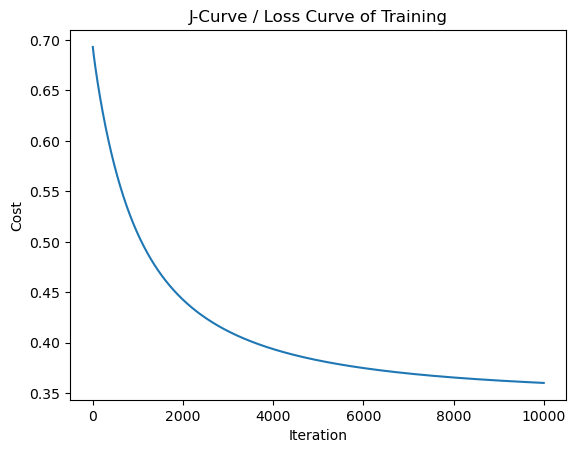

In [4]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
# Print out the final weights
w = Vanilla_GD(epoch_num,lr,w,X,y)
print(w)
# Plot the J curve w.r.t. the iteration numbers
import matplotlib.pyplot as plt
plt.plot(range(epoch_num), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('J-Curve / Loss Curve of Training')
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss how you can ensure that the model is well trained.

**Your Answer:**  

## Model Evaluation

Evaluate the performance on testing set:
- Print out the confusion matrix
- Calculate and print out the *accuracy*, *precision*, *recall*, and *F1* value of your model

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>


In [6]:
##############################################################################
#                           TODO: Model Evaluation                           #
##############################################################################
def model_evaluation(y_test, y_t_pred):
    tp = np.sum((y_test == 1) & (y_t_pred == 1))
    tn = np.sum((y_test == 0) & (y_t_pred == 0))
    fp = np.sum((y_test == 0) & (y_t_pred == 1))
    fn = np.sum((y_test == 1) & (y_t_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

# accuracy
def accuracy(y_test, y_t_pred):
    correct_predictions = np.sum(y_test == y_t_pred)
    total_predictions = len(y_test)
    return correct_predictions / total_predictions

# precision
def precision(y_test, y_t_pred):
    tp = np.sum((y_test == 1) & (y_t_pred == 1))
    fp = np.sum((y_test == 0) & (y_t_pred == 1))
    return tp / (tp + fp)

# recall
def recall(y_test, y_t_pred):
    tp = np.sum((y_test == 1) & (y_t_pred == 1))
    fn = np.sum((y_test == 1) & (y_t_pred == 0))
    return tp / (tp + fn)

# F1 score
def f1_score(y_test, y_t_pred):
    p = precision(y_test, y_t_pred)
    r = recall(y_test, y_t_pred)
    return 2 * (p * r) / (p + r)

X = np.column_stack([np.ones(len(x1_test)), x1_test, np.power(x1_test, 2), x2_test, x1_test * x2_test, x1_test * np.power(x2_test, 2), np.power(x2_test, 2), np.power(x1_test, 2) * x2_test,np.power(x1_test, 2) * np.power(x2_test, 2)])
X = X.T
y_t_pred = logistic_model(X, w)
y_t_pred = (y_t_pred >= 0.5).astype(int)
print('y_t_pred : ', y_t_pred)
print('y_test:', y_test)

confusion_matrix = model_evaluation(y_test, y_t_pred)
print("Confusion Matrix:", confusion_matrix)

acc = accuracy(y_test, y_t_pred)
print(f"Accuracy: {acc * 100:.2f}%")

prec = precision(y_test, y_t_pred)
print(f"Precision: {prec:.2f}")

rec = recall(y_test, y_t_pred)
print(f"Recall: {rec:.2f}")

f1 = f1_score(y_test, y_t_pred)
print(f"F1 Score: {f1:.2f}")

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

y_t_pred :  [1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1]
y_test: [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1.]
Confusion Matrix: [[13  4]
 [ 1 15]]
Accuracy: 84.85%
Precision: 0.79
Recall: 0.94
F1 Score: 0.86


In [5]:
X = np.column_stack([np.ones(len(x1_test)), x1_test, np.power(x1_test, 2), x2_test, x1_test * x2_test, x1_test * np.power(x2_test, 2), np.power(x2_test, 2), np.power(x1_test, 2) * x2_test,np.power(x1_test, 2) * np.power(x2_test, 2)])
X = X.T
predictions = logistic_model(X, w)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Convert continuous predictions to binary (0 or 1) using a threshold
predictions_binary = (predictions >= 0.5).astype(int)

# Calculate confusion matrix and metrics using the binary predictions
conf_matrix = confusion_matrix(y_test, predictions_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(y_test, predictions_binary)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, predictions_binary)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, predictions_binary)
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[13  4]
 [ 1 15]]
Accuracy: 84.85%
Precision: 0.79
Recall: 0.94
F1 Score: 0.86


## Support Vector Machine (SVM)

In this part, you need to use the previous training and testing data file. 

You are **allowed** to use the svm functions in the **Scikit-learn** library and don’t need to implement the algorithm from scratch.

- You need to try at least **three** different kernel functions of SVM, and pick the **best** model.
- You need to print out the final weights got from your best SVM model.

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>

In [9]:
##############################################################################
#                      TODO: Classfication using SVM                         #
##############################################################################
# Pick the best model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train = np.column_stack([x1, x2])
X_test = np.column_stack([x1_test, x2_test])

best_model = None
best_accuracy = 0
best_kernel = ""

kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y)
    
    predictions = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm_model
        best_kernel = kernel
print(f"Best kernel: {best_kernel}")
print(f"Best accuracy: {best_accuracy * 100:.2f}%")

# Print out the final weights
if best_kernel == 'linear':
    print("Final weights (coefficients) of the best SVM model:")
    print(best_model.coef_)
else:
    print("The best SVM model does not have explicit weights due to its non-linear kernel.")
    
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Best kernel: rbf
Best accuracy: 84.85%
The best SVM model does not have explicit weights due to its non-linear kernel.


AttributeError: coef_ is only available when using a linear kernel

## Visualize Decision Boundary and Model Comparision

You need to plot the decision boundary of Logistic Regression and SVM that you previously trained separately. 

In [ ]:
##############################################################################
#                   TODO: Plot the Decision Boundary                         #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss which one has better performance and why.

**Your Answer:**  